# Chapter 6. AI 기초 - Collaborative Filtering

## Collaborative Filtering(협업 필터링)
* 영화를 추천 받고 싶을 때 가장 일반적인 방법은 다음과 같다.
1. 내가 좋아하는 감독 혹은 장르의 영화를 찾아본다.
2. 성향이 비슷한 친구들이 본 영화를 찾아본다.
* 위의 방법을 필터링으로 변환해보면 다음과 같다.
1. Content Based Filtering
2. Collaborative Filtering(User Based Filtering)

## Collaborative Filtering(협업 필터링) 특징
* 나와 비슷한 취향의 사람들이 좋아하는 것은 나도 좋아할 가능성이 높다.
* 즉, 많은 사용자로부터 얻은 취향 정보를 활용

## 메모리 기반 접근법(Memory-Base-Approach)
1. User-Based(유저 기반 협업 필터링)
* ex) a 사람이 1, 3, 4번 영화를 봤을 때 b 사람이 2번 영화를 봤을 때 a, b 사람은 다른 그룹이고, c 사람이 3, 4번 영화를 봤다면 a 사람이랑 비슷한 영화를 봤기 때문에 a와 c 사람을 Similar User로 판단해 해당 그룹에 속한 다른 사람이 시청한 영화를 추천
* 즉, c 사람에서 1번 영화를 추천
2. Item-Based(컨텐츠 기반 협업 필터링)
* a 사람이 1, 3번 영화, b 사람이 1, 3번 영화, c 사람이 3, 4번 영화를 봤을 때 영화를 Similar Item으로 보고, c 사람에게 1번 영화를 추천


## 유사도 측정방법
* 메모리 기반 접근법의 두 방법 모두 유사도(거리)를 측정하여 사용
* 거리 측정 방ㅂ법은 사용자(행), 아이템(열) 행렬을 사용
* 일반적인 거리 측정 방법
1. Cosine Similarity : 원점상에서 선을 이루어 그 안의 사이각이 작으면 유사하고, 각이 크면 다르다고 판단
2. Pearson Similarity
3. Manhattan Distance : L1(직각으로 점을 연결하여 거리 측정)
4. Euclidean Distance : L2(점과 직선으로 바로 연결하여 거리 측정)

### Ex1)
* 사람4를 사람 1,2,3의 평점과 비교하여 영화 1, 5의 평점을 예측  
구분|영화1|영화2|영화3|영화4|영화5|
|---|---|---|---|---|---|
사람1|9|6|8|4||
사람2|2|10|6||8|
사람3|5|9||10|7|
사람4|?|10|7|8|?|
* 유사도 행렬 : 사람4 & 사람1 = 0.4 / 사람4 & 사람2 = 0.9 / 사람4 & 사람3 = 0.7
* 사람1 * 영화1 = 9 * 0.4 = 3.6
* 사람2 * 영화1 = 2 * 0.9 = 1.8
* 사람3 * 영화1 = 5 * 0.7 = 3.5
* 위의 영화1을 합산한 결과 3.6 + 1.8 + 3.5 = 8.9
* 가중치 합(weight sum = 0.4 + 0.9 + 0.7 = 2.0)
* 평점 평균 : 8.9 / 2.0 = 4.45

### Ex2)
* 평점이 없으면 없는대로 계산
* 사람4의 영화5 = ( (8 * 0.9) + (7 * 0.7) ) / (0.9 + 0.7) = 7.56

## 메모리 기반 접근법 장단점
### 장점
* 최적화(Optimization)나 훈련(Train)이 필요하지 않음
* 쉬운 접근 방식
### 단점
* 희소(Sparse) 데이터의 경우 성능 저하(비교 대상이 적으면, 성능 저하)
* 확장성에 제한(비교 대상이 많아지면 계산량 증가)
* Cold Start(콜드 스타트) - 새로 시작할 때의 곤란함
* 계산 효율성 저하
* Long-Tail(롱 테일) 문제 - 유명한 상위 20%의 영화가 총 조회수의 80%를 차지
* (유명하고, 덜 유명한 영화 사이의 불균형 존재)
### 극복 방안 1 : 콘텐츠 기반 필터링(Contents-Based-Filtering)
* 콘텐츠에 대한 분석을 기반으로 추천
#### 장점
* 많은 사용자의 행동 정보가 필요하지 않음
* 콜드 스타트 문제 해소 가능
#### 단점
* 메타 정보의 한정성 : 상품의 프로파일을 모두 함축하는 데 한계가 있음(정밀성 저하)
* 개인의 성향을 세부적으로 파악하기 힘듦
#### 방법
1. 50명의 Tagger(태거)에 의해 사람이 직접 콘텐츠의 태그를 작성
2. 기계 학습 : 텍스트 마이닝 분석
### 극복 방안 2 : 하이브리드 추천 시스템
* 협업 필터링, 콘텐츠 기반 필터링을 조합
#### 방법
1. 데이터 쌓이기 전 : 콘텐츠 기반 필터링을 통해 콜드 스타트 문제를 해결
2. 데이터 쌓인 후 : 협업 필터링으로 추천의 정확성을 해결

# Cosine Similarity

In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Data

In [2]:
anime = pd.read_csv('./Data/anime.csv')
rating = pd.read_csv('./Data/rating.csv')

In [3]:
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [4]:
# -1이 아닌 평점 데이터 추출
rating = rating[rating['rating'] != -1]

* 이렇게 데이터를 수정하면 1번 유저는 101개의 영화를 보고 4개의 영화만 평점을 부여한 것처럼 될 수 있음
* 따라서 영화를 봤지만 평점을 주지 않은 97개의 데이터는 제거됨
* -1을 제거하면 1번 유저와 같은 유저는 취향 파악이 불가

## EDA

### 유저별 rating 평균 식별

In [5]:
rating.groupby('user_id')['rating'].mean()

user_id
1        10.000000
2        10.000000
3         7.565217
5         4.355120
7         7.387755
           ...    
73512     8.583333
73513     7.515152
73514    10.000000
73515     8.547486
73516     9.000000
Name: rating, Length: 69600, dtype: float64

<Axes: >

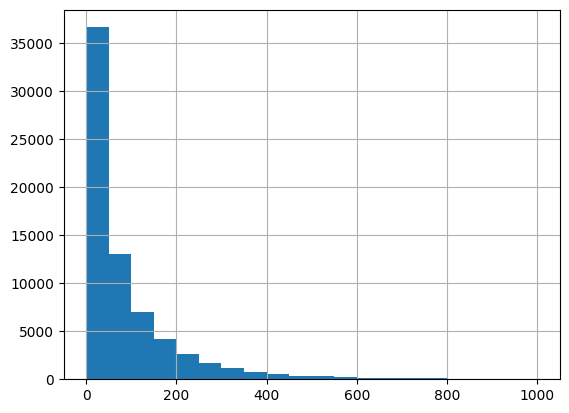

In [6]:
view_per_user = rating.groupby('user_id')['rating'].count()
view_per_user.hist(bins= 20,
                   range= (0, 1000))

### 애니메이션별 rating 평균 식별

<Axes: >

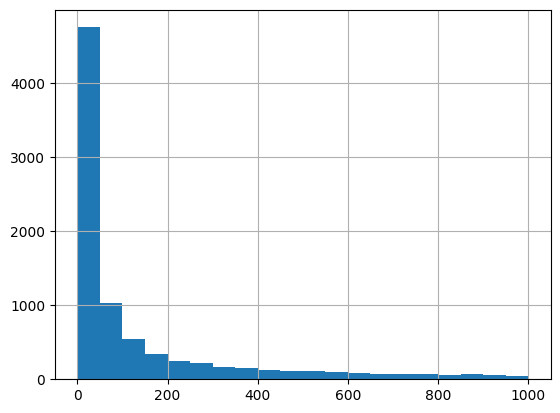

In [7]:
view_per_anime = rating.groupby('anime_id')['rating'].count()
view_per_anime.hist(bins= 20,
                    range= (0, 1000))

## Feature Engineering

### 적게 본 컨텐츠 제거

In [8]:
df_anime = pd.DataFrame(view_per_anime)
popular_anime = df_anime[df_anime['rating'] >= 50].index
popular_anime

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            33372, 33421, 33524, 33558, 33569, 33606, 33964, 34085, 34103,
            34240],
           dtype='int64', name='anime_id', length=5172)

### 20개 이상 본 유저만 추출

In [9]:
df_user = pd.DataFrame(view_per_user)
viewers = df_user[df_user['rating'] >= 20].index
viewers

Int64Index([    3,     5,     7,    11,    12,    14,    17,    18,    19,
               21,
            ...
            73499, 73500, 73501, 73502, 73503, 73504, 73507, 73510, 73513,
            73515],
           dtype='int64', name='user_id', length=47153)

### 데이터 추출

In [10]:
rating.iloc[viewers]

,user_id,anime_id,rating
101,1,15451,10
156,3,20,8
158,3,170,9
162,3,430,7
163,3,527,7
...,...,...,...
91690,946,12531,9
91693,946,12967,7
91696,946,13357,7
91699,946,13659,7


### viewers 목록에 있는 것만 가져온 후 rating 필터링

In [11]:
rating_filtering = rating[rating['user_id'].isin(viewers)]
rating_filtering

,user_id,anime_id,rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9
...,...,...,...
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9


## Pivot Table

In [12]:
rating_matrix = rating_filtering.pivot_table(index= 'user_id',
                                             columns= 'anime_id',
                                             values= 'rating')
rating_matrix = rating_matrix.fillna(0)
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73504,10.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73507,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
rating_matrix[rating_matrix.index == 7]

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Function 1
비슷한 취향을 찾아주는 함수 생성

In [14]:
def similar_users(user_id, matrix, k= 10) :
    # 선택된 유저의 평가 정보
    user = matrix[matrix.index == user_id]
    # 나머지 유저의 평가 정보
    other_user = matrix[matrix.index != user_id]
    
    # 코사인 유사도 계산
    similarity = cosine_similarity(user, other_user)[0]
    # 다른 유저 ID index 생성
    other_user_list = other_user.index
    # 다른 유저와 유사도
    user_similarity = dict(zip(other_user_list, similarity))
    user_similarity = pd.Series(user_similarity)
    
    # 상위 k명 찾기
    top_user = user_similarity.sort_values(ascending= False)[:k]
    return top_user

In [15]:
pd.Series(similar_users(7, rating_matrix))

1287     0.433745
17696    0.430103
65477    0.430008
20146    0.429461
40648    0.429372
44971    0.413130
34917    0.411826
60171    0.410811
61707    0.410040
18805    0.409579
dtype: float64

In [16]:
similar_users(7, rating_matrix)

1287     0.433745
17696    0.430103
65477    0.430008
20146    0.429461
40648    0.429372
44971    0.413130
34917    0.411826
60171    0.410811
61707    0.410040
18805    0.409579
dtype: float64

## Function 2
나와 취향이 비슷한 유형 찾은 데이터를 넣으면, 안 본 영화 TOP 5와 TOP 10 같은 걸 뽑아주는 함수

In [17]:
def recommend_contents(user_id, matrix, k= 10, n= 10) :
    top_user = similar_users(user_id, matrix, k= k)
    
    # 성향이 비슷한 사용자의 사용자 - 콘텐츠 행렬
    u_c_matrix = matrix.loc[top_user.index]
    weighted_u_c_matrix = u_c_matrix.apply(lambda x : x * top_user)
    score = weighted_u_c_matrix.sum()
    
    # 시청하지 않은 콘텐츠 필터링
    user = matrix.loc[user_id]
    nonwatch_score = score[user == 0]
    recom_contents = nonwatch_score.sort_values(ascending = False)[:n]
    return recom_contents

In [18]:
recommend_contents(7, rating_matrix)

anime_id
13759    37.056194
5081     36.175650
15689    35.330452
10790    35.319132
23277    34.943991
28677    34.929084
8841     34.909092
6547     34.850119
6347     34.590149
22147    34.532640
dtype: float64

In [19]:
recom_list = recommend_contents(7, rating_matrix, k= 10, n= 10)

anime_ = anime.set_index('anime_id')
anime_.loc[recom_list.index]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
13759,Sakurasou no Pet na Kanojo,"Comedy, Drama, Romance, School, Slice of Life",TV,24,8.40,380375
5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,8.39,482268
15689,Nekomonogatari: Kuro,"Comedy, Romance, Supernatural",TV,4,8.06,173264
10790,Kore wa Zombie Desu ka? of the Dead,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",TV,10,7.78,180032
23277,Saenai Heroine no Sodatekata,"Comedy, Ecchi, Harem, Romance, School",TV,12,7.69,155795
28677,Yamada-kun to 7-nin no Majo (TV),"Comedy, Harem, Mystery, Romance, School, Shoun...",TV,12,7.91,193566
8841,Kore wa Zombie Desu ka?,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",TV,12,7.67,295782
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
6347,Baka to Test to Shoukanjuu,"Comedy, Romance, School, Super Power",TV,13,7.83,301282
